The BoostedTrees.ipynb contains different machine learning algorithms to predict the daily bitcoin value. It sets the benchmark for cryptocurrency portfolio advisor, which is a recommender system. It is more like a test to find the most effective algorithm.

In [1]:
import numpy as np 
import pandas as pd 

from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn import ensemble
from sklearn import linear_model


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
def Datapreperation():
    df = pd.read_csv("crypto-markets.csv")
    bitcoin_df = pd.DataFrame(df.loc[df.name =="Bitcoin", ["date", "open", "close", "high", "low"]]).set_index("date")
    bitcoin_df["close_nextday"] = bitcoin_df["close"].shift(periods = -1, fill_value = 0)
    temp = bitcoin_df[["open", "close", "high", "low"]]
    temp = temp[1800:]
    return bitcoin_df, temp

In [3]:
def TestTrainpreperation(bitcoin_df):
    X = bitcoin_df[["open", "close", "high", "low"]]
    y = bitcoin_df[["close_nextday"]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    return X_train, X_test, y_train, y_test

Random Forest Regression

In [4]:
def RandomForestRegressor(bitcoin_df, X_train, X_test, y_train, y_test, temp, acc):
    bitcoin_rfr = ensemble.RandomForestRegressor()
    bitcoin_rfr.fit(X_train, y_train)
    
    acc.at["r2_score", "RandomForestRegressor"] = metrics.r2_score(y_test, bitcoin_rfr.predict(X_test))
    acc.at["mean_squared_error", "RandomForestRegressor"] = metrics.mean_squared_error(y_test, bitcoin_rfr.predict(X_test))
    
    
    results =pd.DataFrame(bitcoin_rfr.predict(temp))
    results = results.rename(columns={0: "Prediction_rfr"})
    results = results.set_index(temp.index)

    bitcoin_df = bitcoin_df.join(results, how = "left")
    return bitcoin_df, acc

Ada Boost Regression

In [14]:
def AdaBoostRegressor(bitcoin_df, X_train, X_test, y_train, y_test, temp, acc):
    bitcoin_abr = ensemble.AdaBoostRegressor()
    bitcoin_abr.fit(X_train, y_train)
    
    acc.at["r2_score", "AdaBoostRegressor"] = metrics.r2_score(y_test, bitcoin_abr.predict(X_test))
    acc.at["mean_squared_error", "AdaBoostRegressor"] = metrics.mean_squared_error(y_test, bitcoin_abr.predict(X_test))
    
    results =pd.DataFrame(bitcoin_abr.predict(temp))
    results = results.rename(columns={0: "Prediction_abr"})
    results = results.set_index(temp.index)

    bitcoin_df = bitcoin_df.join(results, how = "left")
    return bitcoin_df, acc

ExtraTrees Regression

In [15]:
def ExtraTreesRegressor(bitcoin_df, X_train, X_test, y_train, y_test, temp, acc):
    bitcoin_etr = ensemble.ExtraTreesRegressor()
    bitcoin_etr.fit(X_train, y_train)
    acc.at["r2_score", "ExtraTreesRegressor"] = metrics.r2_score(y_test, bitcoin_etr.predict(X_test))
    acc.at["mean_squared_error", "ExtraTreesRegressor"] = metrics.mean_squared_error(y_test, bitcoin_etr.predict(X_test))
    
    results =pd.DataFrame(bitcoin_etr.predict(temp))
    results = results.rename(columns={0: "Prediction_etr"})
    results = results.set_index(temp.index)

    bitcoin_df = bitcoin_df.join(results, how = "left")
    return bitcoin_df, acc

Histogram Gradient Boosting Regression

In [16]:
def HistGradientBoostingRegressor(bitcoin_df, X_train, X_test, y_train, y_test, temp, acc):
    bitcoin_hgbr = ensemble.HistGradientBoostingRegressor()
    bitcoin_hgbr.fit(X_train, y_train)
    acc.at["r2_score", "HistGradientBoostingRegressor"] = metrics.r2_score(y_test, bitcoin_hgbr.predict(X_test))
    acc.at["mean_squared_error", "HistGradientBoostingRegressor"] = metrics.mean_squared_error(y_test, bitcoin_hgbr.predict(X_test))
    
    results =pd.DataFrame(bitcoin_hgbr.predict(temp))
    results = results.rename(columns={0: "Prediction_hgbr"})
    results = results.set_index(temp.index)

    bitcoin_df = bitcoin_df.join(results, how = "left")
    return bitcoin_df, acc


Gradient Tree Boosting Regression

In [17]:
def GradientBoostingRegressor(bitcoin_df, X_train, X_test, y_train, y_test, temp, acc):
    bitcoin_gtb = ensemble.GradientBoostingRegressor()
    bitcoin_gtb.fit(X_test, y_test)
    acc.at["r2_score", "GradientBoostingRegressor"] = metrics.r2_score(y_test, bitcoin_gtb.predict(X_test))
    acc.at["mean_squared_error", "GradientBoostingRegressor"] = metrics.mean_squared_error(y_test, bitcoin_gtb.predict(X_test))
    
    results =pd.DataFrame(bitcoin_gtb.predict(temp))
    results = results.rename(columns={0: "Prediction_gtb"})
    results = results.set_index(temp.index)

    bitcoin_df = bitcoin_df.join(results, how = "left")

    return bitcoin_df, acc

Multi Task Lasso Regression

In [18]:
def MultiTaskLasso(bitcoin_df, X_train, X_test, y_train, y_test, temp, acc):
    bitcoin_ml = linear_model.MultiTaskLasso()
    bitcoin_ml.fit(X_train, y_train)
    acc.at["r2_score", "MultiTaskLasso"] = metrics.r2_score(y_test, bitcoin_ml.predict(X_test))
    acc.at["mean_squared_error", "MultiTaskLasso"] = metrics.mean_squared_error(y_test, bitcoin_ml.predict(X_test))
    
    results =pd.DataFrame(bitcoin_ml.predict(temp))
    results = results.rename(columns={0: "Prediction_ml"})
    results = results.set_index(temp.index)

    bitcoin_df = bitcoin_df.join(results, how = "left")

    return bitcoin_df, acc

Multi Task Elastic Net Regression

In [19]:
def MultiTaskElasticNet(bitcoin_df, X_train, X_test, y_train, y_test, temp, acc):
    bitcoin_mten = linear_model.MultiTaskElasticNet()
    bitcoin_mten.fit(X_train, y_train)
    acc.at["r2_score", "MultiTaskElasticNet"] = metrics.r2_score(y_test, bitcoin_mten.predict(X_test))
    acc.at["mean_squared_error", "MultiTaskElasticNet"] = metrics.mean_squared_error(y_test, bitcoin_mten.predict(X_test))
    
    results =pd.DataFrame(bitcoin_mten.predict(temp))
    results = results.rename(columns={0: "Prediction_mten"})
    results = results.set_index(temp.index)

    bitcoin_df = bitcoin_df.join(results, how = "left")

    return bitcoin_df, acc

Calculate Prediction Scores

In [20]:
score = pd.DataFrame(index = ["r2_score", "mean_squared_error"], columns= ["RandomForestRegressor", "AdaBoostRegressor", "ExtraTreesRegressor", "GradientBoostingRegressor", "MultiTaskLasso", "MultiTaskElasticNet" ])

bitcoin_df, temp = Datapreperation()

X_train, X_test, y_train, y_test = TestTrainpreperation(bitcoin_df)

bitcoin_df, score = RandomForestRegressor(bitcoin_df, X_train, X_test, y_train, y_test, temp, score)

bitcoin_df, score  = AdaBoostRegressor(bitcoin_df, X_train, X_test, y_train, y_test, temp, score)

bitcoin_df, score  = ExtraTreesRegressor(bitcoin_df, X_train, X_test, y_train, y_test, temp, score)

#bitcoin_df = HistGradientBoostingRegressor(bitcoin_df, X_train, X_test, y_train, y_test, temp, score)

bitcoin_df,score = GradientBoostingRegressor(bitcoin_df, X_train, X_test, y_train, y_test, temp, score)

bitcoin_df, score = MultiTaskLasso(bitcoin_df, X_train, X_test, y_train, y_test, temp, score)

bitcoin_df, score = MultiTaskElasticNet(bitcoin_df, X_train, X_test, y_train, y_test, temp, score)

<ipython-input-4-fead37f0f455>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  bitcoin_rfr.fit(X_train, y_train)
/Users/ianchen/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-15-1529e38020ea>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  bitcoin_etr.fit(X_train, y_train)
/Users/ianchen/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Us

               open    close     high      low  close_nextday  Prediction_rfr  \
date                                                                            
2018-04-02  6844.86  7083.80  7135.47  6816.58        7456.11       7274.2720   
2018-04-03  7102.26  7456.11  7530.94  7072.49        6853.84       7036.6383   
2018-04-04  7456.41  6853.84  7469.88  6803.88        6811.47       6901.1837   
2018-04-05  6848.65  6811.47  6933.82  6644.80        6636.32       6934.5930   
2018-04-06  6815.96  6636.32  6857.49  6575.00        6911.09       6569.5362   
...             ...      ...      ...      ...            ...             ...   
2018-11-25  3880.78  4009.97  4120.87  3585.06        3779.13       3998.8465   
2018-11-26  4015.07  3779.13  4107.14  3643.92        3820.72       3849.3886   
2018-11-27  3765.95  3820.72  3862.96  3661.01        4257.42       4079.5525   
2018-11-28  3822.47  4257.42  4385.90  3822.47        4278.85       3563.7823   
2018-11-29  4269.00  4278.85

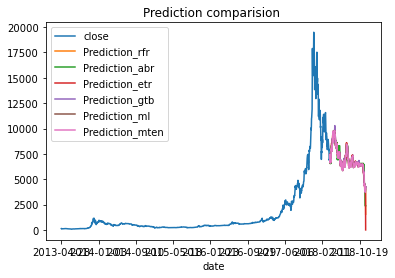

In [22]:
print(bitcoin_df[1800:])
print(score)
print(bitcoin_df[["close", "Prediction_rfr","Prediction_abr", "Prediction_etr", "Prediction_gtb", "Prediction_ml", "Prediction_mten"]].plot(title = "Prediction comparision "))